<a href="https://colab.research.google.com/github/breshmashri/C119-Decision-Tree/blob/main/C119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
import pandas as pd

colunm_names = ['pregnant', 'glucose', 'bp', 'st', 'insulin', 'bmi', 'predigee', 'age', 'label']

df = pd.read_csv("diabetes.csv", names = colunm_names).iloc[1:]

print(df.head())

  pregnant glucose  bp  st insulin   bmi predigee age label
1        6     148  72  35       0  33.6    0.627  50     1
2        1      85  66  29       0  26.6    0.351  31     0
3        8     183  64   0       0  23.3    0.672  32     1
4        1      89  66  23      94  28.1    0.167  21     0
5        0     137  40  35     168  43.1    2.288  33     1


In [4]:
features = ['pregnant', 'glucose', 'bp', 'st', 'insulin', 'bmi', 'predigee', 'age']
x = df[features]
y = df.label

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state = 1)
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.6764227642276422


In [21]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0', '1'])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<glucose &le; 145.0<br/>gini = 0.464<br/>samples = 153<br/>value = [97, 56]<br/>class = 0>, fillcolor="#f4caab"] ;
1 [label=<pregnant &le; 5.5<br/>gini = 0.385<br/>samples = 119<br/>value = [88, 31]<br/>class = 0>, fillcolor="#eead7f"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<st &le; 41.5<br/>gini = 0.24<br/>samples = 86<br/>value = [74, 12]<br/>class = 0>, fillcolor="#e99559"] ;
1 -> 2 ;
3 [label=<gini = 0.198<br/>samples = 81<br/>value = [72, 9]<br/>class = 0>, fillcolor="#e89152"] ;
2 -> 3 ;
4 [label=<gini = 0.48<br/>samples = 5<br/>value = [2, 3]<br/>class = 1>, fillcolor="#bddef6"] ;
2 -> 4 ;
5 [label=<predigee &le; 0.179<br/>gini = 0.489<br/>samples = 33<br/>value = [14, 19]<br/>class = 1>, fillcolor="#cbe5f8"] ;
1 -> 5 ;
6 [label=<gini = 0.278<br/>samples = 6<br/>value = [5, 1]<br/>class = 0>, fillcolor="#ea9a61"] ;
5

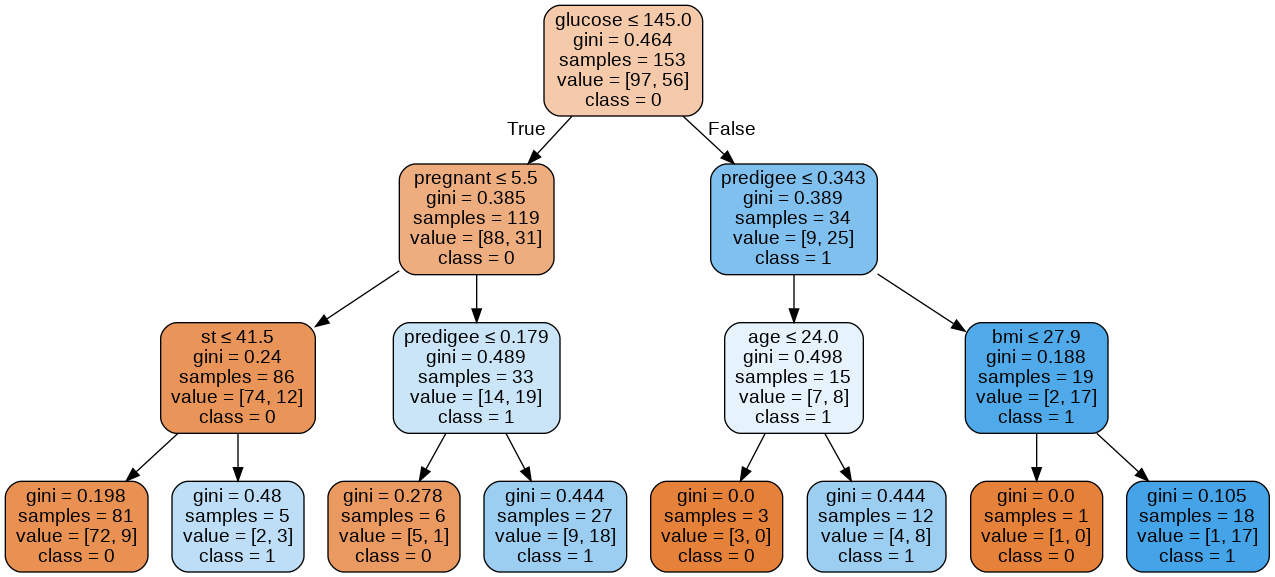

In [22]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())